In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [24]:
link = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"
response = requests.get(link)
json_data = response.json()
df = pd.DataFrame(json_data)
df

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y



 Approved Sel-Employed applications made up only 9% of all applicants.


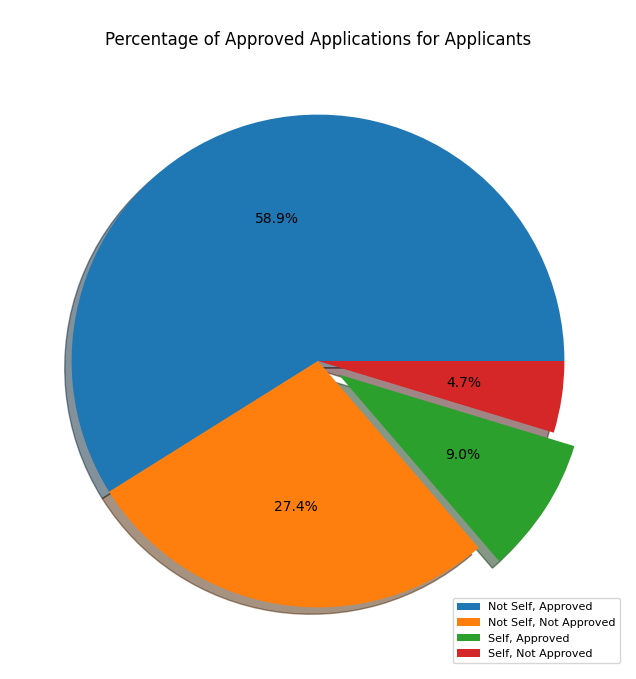

In [106]:
# Find and plot the percentage of applications approved for self-employed applicants.
self_employed = df.groupby(by="Self_Employed")["Application_Status"].value_counts()
print("\n Approved Sel-Employed applications made up only 9% of all applicants.")
plt.figure(figsize=(8,8))
self_employed.plot(kind="pie", labels=None, explode=(0,0,0.1,0),shadow=True, autopct="%1.1f%%")
plt.title("\nPercentage of Approved Applications for Applicants")
plt.legend(loc="lower right", labels =["Not Self, Approved","Not Self, Not Approved", "Self, Approved","Self, Not Approved"], fontsize=8)
plt.ylabel("")
plt.show()



Insight:
28.4% of Married Male Applicants were rejected


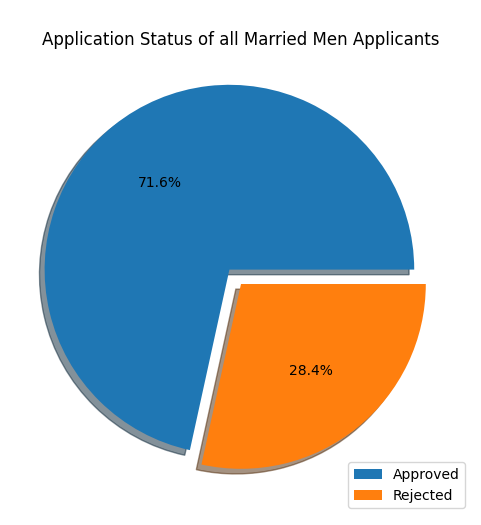

In [96]:
# Find the percentage of rejection for married male applicants.
self_employed = df.groupby(["Married", "Gender"])["Application_Status"].value_counts()

list=[]
list.append(self_employed[6])
list.append(self_employed[7])
print("\nInsight:\n28.4% of Married Male Applicants were rejected")
plt.figure(figsize=(7,6))
plt.pie(list, shadow=True, explode=(0.1, 0), autopct="%1.1f%%", labels=None)
plt.title("\nApplication Status of all Married Men Applicants")
plt.legend(labels =["Approved", "Rejected"], loc="lower right")
plt.show()


Insights:
The Top 3 months by Transaction Total was October, May, and December


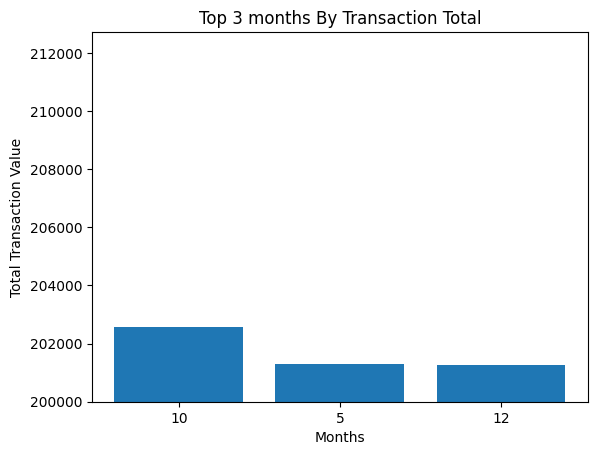

In [26]:
# Find and plot the top three months with the largest transaction data.
new_credit_df = pd.read_json("cdw_sapp_credit.json", lines=True)

new_credit_df.groupby(by="MONTH")["TRANSACTION_VALUE"].sum().sort_values(ascending=False).head(3)
# # x=[10, 5, 12]
# # new_credit_df.plot(kind="bar")
print("\nInsights:\nThe Top 3 months by Transaction Total was October, May, and December")
plt.bar(x=["10", "5", "12"], height= new_credit_df.groupby(by="MONTH")["TRANSACTION_VALUE"].sum().sort_values(ascending=False).head(3))
plt.title("Top 3 months By Transaction Total")
plt.xlabel("Months")
plt.ylabel("Total Transaction Value")
plt.ylim(200000)
plt.show()


Insights:
Branch Code 25 processd the highest total dollar value of healthcare transactions at a total of $4370.18


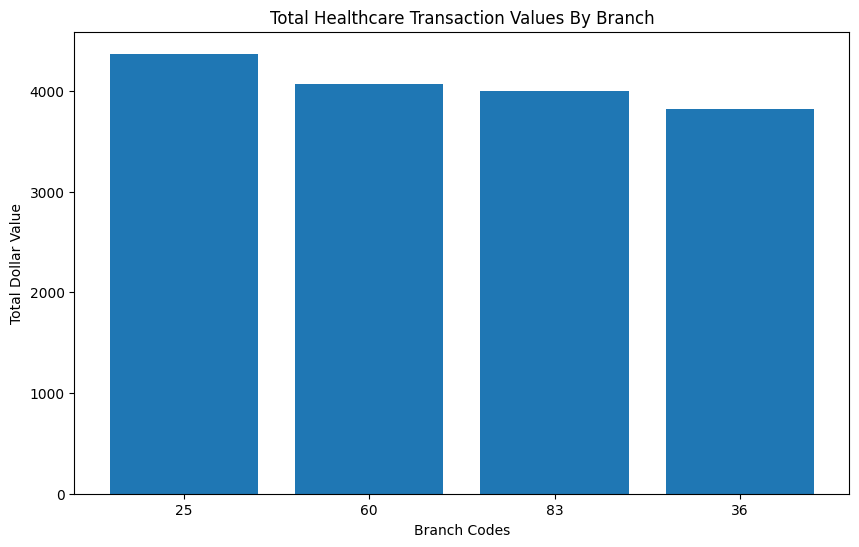

In [80]:
# Find and plot which branch processed the highest total dollar value of healthcare transactions.

new_credit_df.groupby(["BRANCH_CODE", "TRANSACTION_TYPE"])["TRANSACTION_VALUE"].sum().sort_values(ascending=False).head(35)
# # x=pd.DataFrame(new_credit_df.groupby(["BRANCH_CODE", "TRANSACTION_TYPE"])["TRANSACTION_VALUE"].sum().sort_values(ascending=False).head(15))
# # x.loc("TRANSACTION_TYPE"=="Healthcare")
# # x.loc[x["TRANSACTION_TYPE"]=="Healthcare"]
branch_code=["25", "60", "83", "36"]
transaction_total=[4370.18, 4072.04, 4003.37, 3823.87]
print("\nInsights:\nBranch Code 25 processd the highest total dollar value of healthcare transactions at a total of $4370.18")
plt.figure(figsize=(10,6))
plt.bar(x=branch_code, height=transaction_total)
plt.title("Total Healthcare Transaction Values By Branch")
plt.xlabel("Branch Codes")
plt.ylabel("Total Dollar Value")

plt.show()